<a href="https://colab.research.google.com/github/ianara01/Park-Sangjin/blob/master/Deep_learning_Regression_code_Pattern_(Drug_Toxicity_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jun 25 03:17:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 필요한 라이브러리 및 데이터 준비

### 라이브러리 설치하기

In [ ]:
# 필요한 라이브러리 설치하기

!pip install PyTDC
!pip install lifelines
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 데이터 준비

[Therapeutics Data Commons](https://tdcommons.ai/)

# Toxicity Prediction Task Overview

---

**Definition**: Majority of the drugs have some extents of toxicity to the human organisms. This learning task aims to predict accurately various types of toxicity of a drug molecule towards human organisms.

**Impact**: Toxicity is one of the primary causes of compound attrition. Study shows that approximately 70% of all toxicity-related attrition occurs preclinically (i.e., in cells, animals) while they are strongly predictive of toxicities in humans. This suggests that an early but accurate prediction of toxicity can significantly reduce the compound attribution and boost the likelihood of being marketed.

**Generalization**: Similar to the ADME prediction, as the drug structures of interest evolve over time, toxicity prediction requires a model to generalize to a set of novel drugs with small structural similarity to the existing drug set.

**Product**: Small-molecule.

**Pipeline**: Efficacy and safety - lead development and optimization.

### Acute Toxicity LD50
**Dataset Description**: Acute toxicity LD50 measures the most conservative dose that can lead to lethal adverse effects. The higher the dose, the more lethal of a drug. This dataset is kindly provided by the authors of [1].

**Task Description**: Regression. Given a drug SMILES string, predict its acute toxicity.

**Dataset Statistics**: 7,385 drugs.



In [ ]:
from tdc.single_pred import Tox

# TDC api를 이용하여 LD50 데이터 불러오기 
data = Tox(name = 'LD50_Zhu')
# 불러온 데이터 train-valid-test로 나누기
split = data.get_split()

Downloading...
100%|██████████| 707k/707k [00:00<00:00, 13.6MiB/s]
Loading...
Done!


In [ ]:
# 나누어진 데이터 확인
split.keys()

dict_keys(['train', 'valid', 'test'])

In [ ]:
# Train data
split['train']

,Drug_ID,Drug,Y
0,"Methane, tribromo-",BrC(Br)Br,2.343
1,Bromoethene (9CI),C=CBr,2.330
2,"1,1'-Biphenyl, hexabromo-",Brc1ccc(-c2ccc(Br)c(Br)c2Br)c(Br)c1Br,1.465
3,"Isothiocyanic acid, p-bromophenyl ester",S=C=Nc1ccc(Br)cc1,2.729
4,"Benzene, bromo-",Brc1ccccc1,1.765
...,...,...,...
5165,"Benzenesulfonic acid, 3,5-dimethyl-4-hydroxy-",Cc1cc(S(=O)(=O)O)cc(C)c1O,1.883
5166,"Isocyanic acid, (alpha,alpha,alpha-trifluoro-o...",O=C=Nc1ccccc1C(F)(F)F,1.427
5167,"Propanenitrile, 3-((2-(acetyloxy)ethyl)phenyla...",CC(=O)OCCN(CCC#N)c1ccccc1,2.050
5168,"IH-Indene-1,3(2H)-dione, 2-(2-methyl-1-(2-(1-p...",CC1=CC(=C2C(=O)c3ccccc3C2=O)C=CN1CCN1CCCCC1,2.951


In [ ]:
# Valid data
split['valid']

,Drug_ID,Drug,Y
0,"Heptanoic acid, 7-iodo-",O=C(O)CCCCCCI,2.058
1,"2(1H)-Quinazolinone, 4-(3-hydroxyphenyl)-7-met...",Cc1ccc2c(-c3cccc(O)c3)nc(=O)n(C(C)C)c2c1,2.266
2,"Heptanoic acid, 2-(4-(3-(2-(trifluoromethyl)-1...",CCCCCCC(=O)OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F...,3.378
3,"1-Butanol, 2-ethyl-",CCC(CC)CO,1.742
4,"2,8,9-Trioxa-5-aza-1-silabicyclo(3.3.3)undecan...",Clc1cccc([Si]23OCCN(CCO2)CCO3)c1,4.255
...,...,...,...
733,"(1)-alpha,alpha,4-Trimethylcyclohex-3-ene-1-me...",CC1=CCC(C(C)(C)O)CC1,1.475
734,5-(Aminomethyl)isoxazol-3-ol hydrate,NCc1cc(=O)[nH]o1,3.404
735,"Acetaldehyde, diethyl acetal",CCOC(C)OCC,1.410
736,"3H-1,4-Benzodiazepin-2-amine, 7-chloro-N-(cycl...",[O-][N+]1=C(c2ccccc2)c2cc(Cl)ccc2N=C(NCC2CC2)C1,1.888


In [ ]:
# Tset data
split['test']

,Drug_ID,Drug,Y
0,"Ether, alpha-(bromomethyl)-p-cyclopentylbenzyl...",CCCCOC(CBr)c1ccc(C2CCCC2)cc1,3.114
1,"Benzene, 1,4-dinitroso-",O=Nc1ccc(N=O)cc1,2.125
2,"Succinic acid, mercapto-, diethyl ester, S-est...",CCOC(=O)CC(SP(=O)(OC)SC)C(=O)OCC,3.466
3,"Phosphorodithioic acid, O,S,S-triethyl ester",CCOP(=O)(SCC)SCC,3.185
4,"Phenol, 2-octyl- (9CI)",CCCCCCCCc1ccccc1O,1.867
...,...,...,...
1472,"1H-1,2,4-Triazole, 1-((2-(2,4-dichlorophenyl)-...",CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,2.353
1473,"Phosphorothioic acid, O-(3-chloro-4-nitropheny...",CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])c(Cl)c1,3.814
1474,"Dibenz(b,f)oxepin-2-acetic acid, 10,11-dihydro...",Cc1ccc2c(c1)CC(=O)c1cc(CC(=O)O)ccc1O2,2.937
1475,"Phosphorothioic acid, O,O-dimethyl S-(2-(ethyl...",CCS(=O)(=O)CCSP(=O)(OC)OC,3.908


# 데이터 전처리 (Data pre-processing)



![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFKOgPo0QcY4xOM22QKWy1Z62-XlXFrPc9bw&usqp=CAU)


**자세한 내용은 아래 링크 참조하세요**

[RDkit](https://www.rdkit.org/docs/GettingStartedInPython.html)

[Molecular representations in AI-driven drug discovery: a review and practical guide](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00460-5)


[Extended-Connectivity Fingerprints](https://pubs.acs.org/doi/full/10.1021/ci100050tcasa_token=vsI6rp6l2RYAAAAA%3A_HTqMGypPZSQJnF4VqM4xl7KApBKMtKD1STnbh_EHOWeFOsfPKGETjY-SaiC-9XQtyhIEZHvGRRcMcEM)





In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

def smiles2morgan(s, radius = 2, nBits = 1024):
    """SMILES data를 morgan fingerprint 데이터로 변환

    Args:
        s (str): SMILES of a drug
        radius (int): ECFP radius
        bBits (int): size of binary representation

    Return ():
        morgan fingerprint 

    """
    try:
        mol = Chem.MolFromSmiles(s)
        features_vec = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        features = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(features_vec, features)
    except:
        print('rdkit not found this smiles for morgan: ' + s + ' convert to all 0 features')
        features = np.zeros((nBits, ))
        
    return features

In [ ]:
# 전처리 함수 적용하기

for mode in ['train', 'valid', 'test']:  
  split[mode]['embedding'] = split[mode]['Drug'].apply(smiles2morgan)

In [ ]:
# morgan fingerprint로 변환된 데이터 확인 

split["test"]['embedding']

0       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1472    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1473    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1474    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1475    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1476    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: embedding, Length: 1477, dtype: object

### Torch dataset & DataLoader 만들기

In [ ]:
import torch
from torch import nn 
import torch.nn.functional as F
from torch.utils import data


In [ ]:
class data_process_loader(data.Dataset):
    """전처리한 데이터를 학습에 사용하기 위한 추상 클래스
    torch.utils.data.Dataset을 상속
    """
    def __init__(self, df):
        # 생성자
        # 앞서 전처리한 데이터 attribute에 저장
        self.df = df

    def __len__(self):
        # 전체 샘플 개수 출력을 위한 method
        return self.df.shape[0]

    def __getitem__(self, index):
        # 인덱스로 데이터에 접근하기 위한 method
        v_d = self.df.iloc[index]['embedding']  # input
        y = self.df.iloc[index]['Y'] # label

        return v_d, y

In [ ]:
train_dataset = data_process_loader(split["train"])
valid_dataset = data_process_loader(split["valid"])
test_dataset = data_process_loader(split["test"])

In [ ]:
# DataLoader을 위한 hyperparameter 설정

params = {'batch_size': 64,
        'shuffle': True,
        'num_workers': 1,
        'drop_last': False}

In [ ]:
training_generator = data.DataLoader(train_dataset, **params)
valid_generator = data.DataLoader(valid_dataset, **params)
test_generator = data.DataLoader(test_dataset, **params)

In [ ]:
# DataLoader로 쌓인 데이터 확인해보기

for v_d, y in training_generator:
    print(v_d)
    print(v_d.shape)
    print()
    print(y)
    print(y.shape)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
torch.Size([64, 1024])

tensor([2.6820, 2.2340, 1.8290, 4.0320, 1.3790, 3.0260, 2.7370, 1.0810, 2.6020,
        2.0810, 4.7400, 3.4380, 2.9720, 2.2130, 2.3400, 2.4850, 3.4290, 1.5270,
        2.2440, 2.7110, 1.9390, 2.2370, 2.9260, 2.3450, 2.0960, 2.2030, 1.7020,
        1.6450, 3.1990, 1.8980, 1.8900, 1.7030, 1.7720, 2.1540, 1.8050, 3.7800,
        2.6360, 3.5670, 1.7650, 1.7770, 2.5150, 2.9480, 3.0080, 3.5970, 2.1230,
        2.6060, 1.8580, 2.9280, 2.4320, 3.3260, 3.3430, 4.3190, 1.8180, 2.0550,
        3.3390, 3.0180, 2.8910, 2.3390, 3.1800, 1.8120, 2.2730, 3.6110, 1.6910,
        1.5880], dtype=torch.float64)
torch.Size([64])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"현재 device는 {device} 입니다.")

현재 device는 cuda 입니다.


# 모델 만들기

### Feature extractor


In [ ]:
class MLP(nn.Sequential):
	def __init__(self, input_dim, output_dim, hidden_dims_lst):
		'''Feature extractor
			Args:
				input_dim (int): 입력층 차원
				output_dim (int): 출력층 차원
				hidden_dims_lst (list): hidden 차원의 차원
		'''
		super(MLP, self).__init__()
  
		# Feature extractor layer size 
		layer_size = len(hidden_dims_lst) + 1

		# 각 층의 차원 크기를 담은 리스트 
		dims = [input_dim] + hidden_dims_lst + [output_dim]

		# 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v):
		# 입력 데이터 v로 forward pass 
		v = v.float().to(device)
		for i, l in enumerate(self.predictor):
			v = F.relu(l(v))
		return v  


### Classifier

In [ ]:
class Classifier(nn.Sequential):
	def __init__(self, model_drug, hidden_dim_drug, cls_hidden_dims):
		'''Classifier
			Args:
				model_drug : 앞서 생성한 Feature extractor 
				hidden_dim_drug (int): 
Classifier 입력층 차원
				cls_hidden_dims (list): 
Classifier hidden 차원
		'''
		super(Classifier, self).__init__()
  
		# feature extractor
		self.model_drug = model_drug

		# dropout
		self.dropout = nn.Dropout(0.1)
  
		# classifier 입력 차원
		self.input_dim_drug = hidden_dim_drug

		# classifier hidden 차원
		self.hidden_dims = cls_hidden_dims

		# classifier layer size 
		layer_size = len(self.hidden_dims) + 1

		# 각 층의 차원 크기를 담은 리스트 
		dims = [self.input_dim_drug] + self.hidden_dims + [1]
		
		# 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v_D):
		# feature extractor로 입력 데이터 encoding
		v_f = self.model_drug(v_D)
		
		# forword-pass with classify 
		for i, l in enumerate(self.predictor):
			if i==(len(self.predictor)-1):
				v_f = l(v_f)
			else:
				v_f = F.relu(self.dropout(l(v_f)))
		return v_f 

In [ ]:
# 모델 hyperparameter

input_dim_drug = 1024
hidden_dim_drug = 256
cls_hidden_dims = [1024, 1024, 512]
mlp_hidden_dims_drug = [1024, 256, 64]

In [ ]:
# 모델 선언하기
model_drug = MLP(1024, hidden_dim_drug, mlp_hidden_dims_drug)

In [ ]:
model_drug

MLP(
  (predictor): ModuleList(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=256, bias=True)
  )
)

In [ ]:
model = Classifier(model_drug, hidden_dim_drug, cls_hidden_dims)

In [ ]:
model

Classifier(
  (model_drug): MLP(
    (predictor): ModuleList(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Linear(in_features=1024, out_features=256, bias=True)
      (2): Linear(in_features=256, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=256, bias=True)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

# 모델 학습 진행 (model training)


In [ ]:
# 학습 진행에 필요한 hyperparameter 

learning_rate = 0.0001
decay         = 0.00001
train_epoch   = 15

In [ ]:
# optimizer 

opt      = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = decay)
loss_fn = torch.nn.MSELoss()

In [ ]:
# 라이브러리 호출

import copy
from prettytable import PrettyTable
from time import time
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from lifelines.utils import concordance_index


In [ ]:

loss_history = []

max_MSE = 10000

# 모델 GPU 메모리에 올리기
model = model.to(device)

# Best 모델 초기화
model_max = copy.deepcopy(model)

# 결과 정리를 위한 PrettyTable
valid_metric_record = []
valid_metric_header = ["# epoch"] 
valid_metric_header.extend(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x # float 소숫점 4자리까지만 str로 바꾸기 

# 학습 진행
print('--- Go for Training ---')
# 학습 시작 시간 기록 
t_start = time() 

for epo in range(train_epoch):
    # Model training 
    model.train()
    
    # Mini-batch 학습 
    for i, (v_d, label) in enumerate(training_generator):
        # input data gpu에 올리기 
        v_d = v_d.float().to(device) 
        # forward-pass
        score = model(v_d) 

        n = torch.squeeze(score, 1)

        # 미리 정의한 손실함수(MSE)로 손실(loss) 계산 
        loss = loss_fn(n.float(), label.float().to(device))

        # 각 iteration 마다 loss 기록 
        loss_history.append(loss.item())

        # gradient 초기화
        opt.zero_grad()
        # back propagation
        loss.backward()
        # parameter update
        opt.step()
    
    # gradient tracking X
    with torch.set_grad_enabled(False):
        
        y_pred = []
        y_label = []
        # model validation
        model.eval()

        for i, (v_d, label) in enumerate(valid_generator):
            # validation 입력 데이터 gpu에 올리기
            v_d = v_d.float().to(device)

            # forward-pass
            score = model(v_d)

            # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
            logits = torch.squeeze(score).cpu().numpy()
            label_ids = label.cpu().numpy()

            # 예측값, 참값 기록하기
            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist()
    
    # metric 계산
    mse = mean_squared_error(y_label, y_pred) # MSE 
    r2 = pearsonr(y_label, y_pred)[0] # Pearson correlation coefficient
    p_val = pearsonr(y_label, y_pred)[1] # Pearson correlation p-value
    CI =  concordance_index(y_label, y_pred) # CI 

    # 계산한 metric 합치기
    lst = ["epoch " + str(epo)] + list(map(float2str,[mse, r2, p_val, CI]))

    # 각 epoch 마다 결과값 pretty table에 기록
    table.add_row(lst)
    valid_metric_record.append(lst)
    
    # mse 기준으로 best model 업데이트
    if mse < max_MSE:
        # best model deepcopy 
        model_max = copy.deepcopy(model)
        # max MSE 업데이트 
        max_MSE = mse

    # 각 epoch 마다 결과 출력 
    print('Validation at Epoch '+ str(epo + 1) + ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
						 + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])


--- Go for Training ---
Validation at Epoch 1 , MSE: 0.75073 , Pearson Correlation: 0.51914 with p-value: 3.63E-52 , Concordance Index: 0.67497
Validation at Epoch 2 , MSE: 0.56759 , Pearson Correlation: 0.65210 with p-value: 1.39E-90 , Concordance Index: 0.71931
Validation at Epoch 3 , MSE: 0.48266 , Pearson Correlation: 0.70414 with p-value: 1.49E-111 , Concordance Index: 0.74091
Validation at Epoch 4 , MSE: 0.45178 , Pearson Correlation: 0.73884 with p-value: 2.73E-128 , Concordance Index: 0.75861
Validation at Epoch 5 , MSE: 0.41110 , Pearson Correlation: 0.75584 with p-value: 1.67E-137 , Concordance Index: 0.76843
Validation at Epoch 6 , MSE: 0.43064 , Pearson Correlation: 0.75827 with p-value: 6.98E-139 , Concordance Index: 0.76992
Validation at Epoch 7 , MSE: 0.42401 , Pearson Correlation: 0.75624 with p-value: 9.85E-138 , Concordance Index: 0.77236
Validation at Epoch 8 , MSE: 0.42034 , Pearson Correlation: 0.75604 with p-value: 1.29E-137 , Concordance Index: 0.76945
Validation

# 모델 테스트 진행 (model testing)


In [ ]:
# Test 진행할 데이터 확인 
for i, (v_d, label) in enumerate(test_dataset):
    print(v_d)
    print(label)
    break

[0. 1. 0. ... 0. 0. 0.]
3.114


In [ ]:
# 테스트 진행

y_pred = []
y_label = []

model.eval()
for i, (v_d, label) in enumerate(test_generator):
    # input data gpu에 올리기 
    v_d = v_d.float().to(device)

    # forward-pass
    score = model(v_d)

    # 예측값 gradient graph detach -> cpu로 옮기기 -> numpy 형으로 변환 
    logits = torch.squeeze(score).detach().cpu().numpy()

    # 참값 cpu로 옮기고 numpy 형으로 변환 
    label_ids = label.cpu().numpy()

    # 예측값, 참값 기록
    y_label = y_label + label_ids.flatten().tolist()
    y_pred = y_pred + logits.flatten().tolist()

# metric 계산
mse = mean_squared_error(y_label, y_pred)
r2 = pearsonr(y_label, y_pred)[0]
p_val = pearsonr(y_label, y_pred)[1]
CI =  concordance_index(y_label, y_pred)

print('TestSet Performence Metric '+  ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
        + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])

TestSet Performence Metric  , MSE: 0.39110 , Pearson Correlation: 0.75328 with p-value: 1.07E-270 , Concordance Index: 0.75613


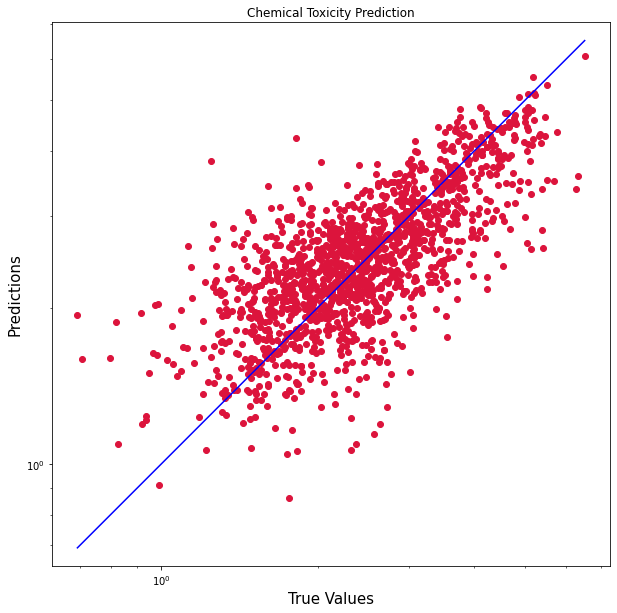

In [ ]:
# 최종 테스트 결과 시각화 
import matplotlib.pyplot as plt

# 참값 ~ 예측값 scatter plot 
plt.figure(figsize=(10,10))
plt.scatter(y_label, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_label))
p2 = min(min(y_pred), min(y_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Chemical Toxicity Prediction')
plt.show()

# 수고하셨습니다